In [ ]:
Implement simple linear regression on a given Dataset
Draw all graphs and submit a pdf with all results
Also on the answersheet explain the dataset and findings of simple linear regression of the dataset chosen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv("auto-mpg[1].csv")

In [3]:
print("First 5 rows:")
print(data.head())

First 5 rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# Clean data — convert '?' to NaN and drop missing rows
data = data.replace('?', np.nan)
data = data.dropna()

In [5]:
# Convert columns to numeric if needed
data['horsepower'] = data['horsepower'].astype(float)

In [6]:
# Select features and target
X = data[['weight']]
y = data['mpg']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [11]:
print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Model Performance:
R² Score: 0.6533
MAE: 3.4641
RMSE: 4.2064


In [12]:
# Show regression equation
print(f"\nRegression Equation: mpg = {model.intercept_:.3f} + ({model.coef_[0]:.3f}) * weight")


Regression Equation: mpg = 47.201 + (-0.008) * weight


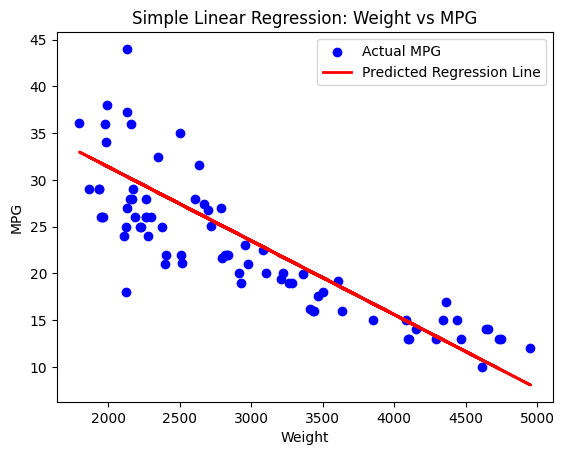

In [13]:
# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual MPG')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Regression Line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Simple Linear Regression: Weight vs MPG')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   


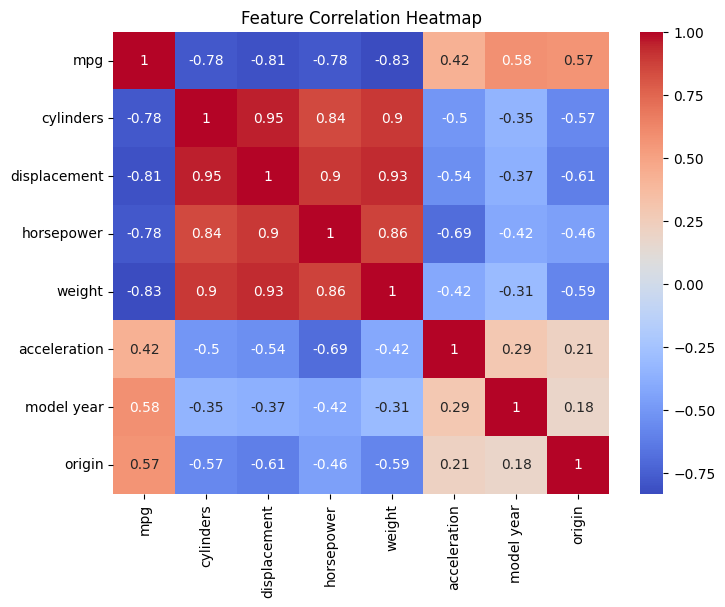

In [15]:
# Explore dataset
print(data.info())
print(data.describe())

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


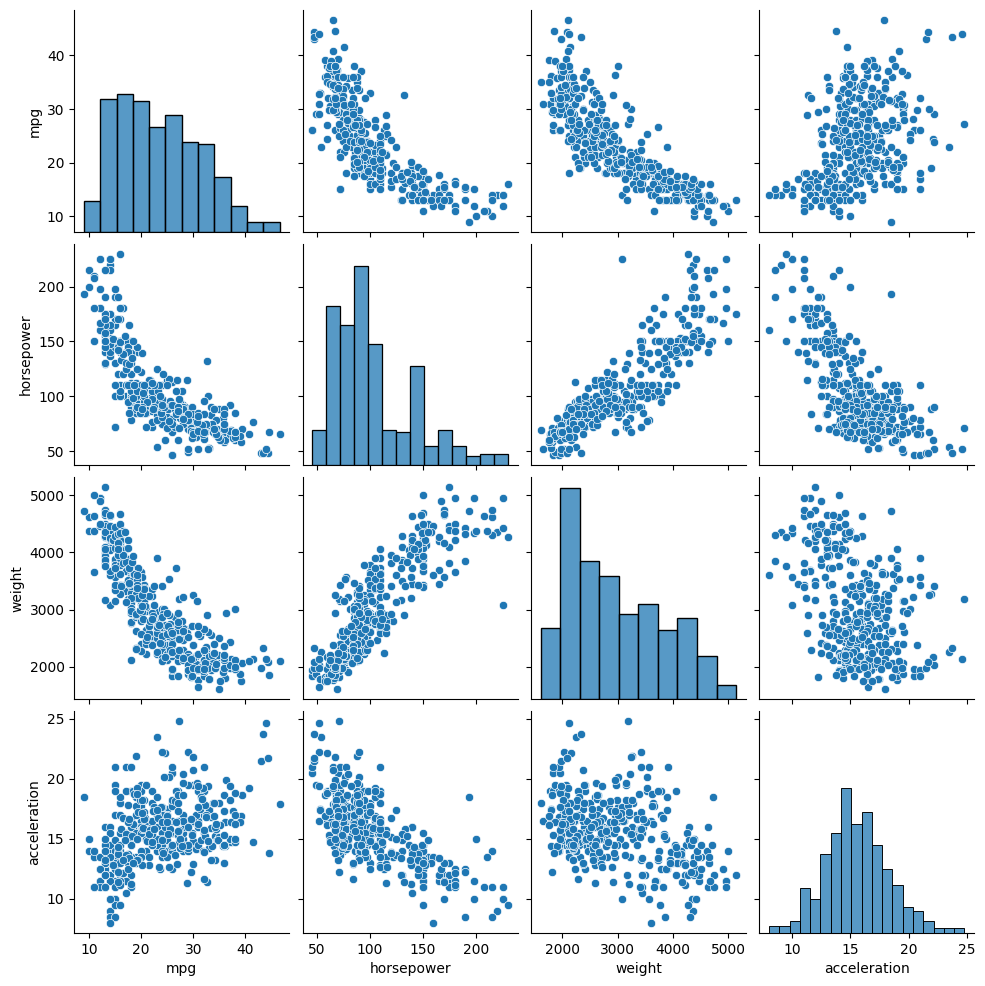

In [16]:
sns.pairplot(data[['mpg', 'horsepower', 'weight', 'acceleration']])
plt.show()


In [17]:
X_multi = data[['weight', 'horsepower', 'acceleration']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

print("Multiple Regression R²:", r2_score(y_test, y_pred_multi))


Multiple Regression R²: 0.6510068285906


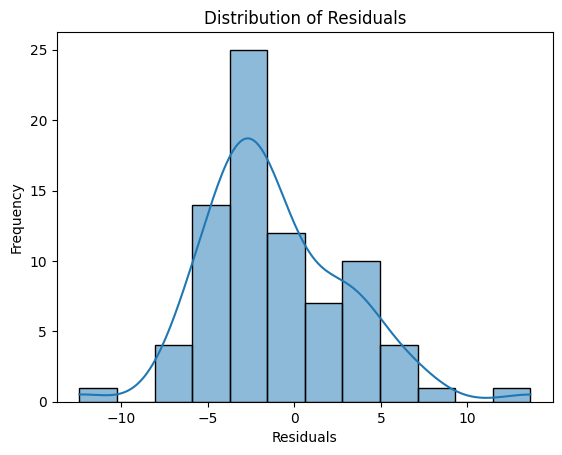

In [19]:
# Step 1: Compute residuals
residuals = y_test - y_pred

# Step 2: Plot the residual distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
print("Polynomial Regression R²:", r2_score(y, y_pred_poly))


Polynomial Regression R²: 0.7151475557845139
